# Statistics & Probability Recap

### Basic statistics

Basic aggregates to describe your dataset $a = (a_1, a_2, a_3, ..., a_n)$ are
- mean or average, often denoted by $\mu$,
- median, 
- mode,
- percentiles.

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

Let's get some crazy dataset

In [2]:
N = 1e6
a = (100 - 20 * np.log(np.square(np.random.randn(N)))).astype(int)  # some crazy dataset
a

array([ 83, 221, 153, ...,  83,  86,  73])

Let's draw a histogram

In [3]:
def hist(a, bins=40, denote_sigma=False):
    counts, bins = np.histogram(a, bins=bins, normed=True)
    bin_width = bins[1] - bins[0]
    f = plt.bar(bins[:-1], counts, bin_width, alpha=.5)
    if denote_sigma:
        mu, std = a.mean(), a.std()
        f = plt.xticks([mu - std, mu, mu + std], ["$\mu - \sigma$", "$\mu$", "$\mu + \sigma$"])        

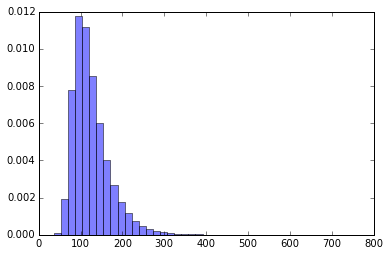

In [4]:
hist(a)

And let's compute some basic statistics

In [5]:
print a.mean()
print np.mean(a)

124.918729
124.918729


In [6]:
print np.median(a)
print np.percentile(a, 50)  # median is the same as 50th percentile

115.0
115.0


In [7]:
print a.min(), np.min(a), min(a), np.percentile(a, 0)
print a.max(), np.max(a), max(a), np.percentile(a, 100)

36 36 36 36.0
713 713 713 713.0


In [8]:
np.percentile(a, 97.5)  # 95th percentile

238.0

In [9]:
# Mode
print stats.mstats.mode(a)
uniques, counts = np.unique(a, return_counts=True)
print uniques[counts.argmax()]
print np.bincount(a).argmax()

(array([ 100.]), array([ 12248.]))
100
100


### Variance and standard deviation

- _Variance_ measures how far a set of numbers is spread out. 
- A variance of zero indicates that all the values are identical.
- Variance is always non-negative: a small variance indicates that the data points tend to be very close to each other
- Variance is computed by $\text{Var}(X) = E((X - \mu)^2)$.

In [10]:
print a.mean(), a.var()

124.918729 1975.14539602


- The _standard deviation_ is defined as the square root of the variance: $\sigma_X = \sqrt{\text{Var} X} = \sqrt{E((X - \mu)^2)}$
- The standard deviation is expressed in the same units as _X_, and hence is better comparable with the data.

In [11]:
print np.std(a)

44.4426078896


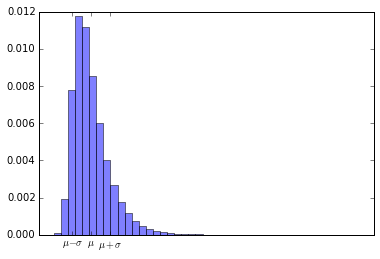

In [12]:
hist(a, denote_sigma=True)

In our distribution, we see that about 75% of the sample lie within one standard deviation away from the mean:

In [13]:
mu, std = a.mean(), a.std()
((a > mu - std) & (a < mu + std)).mean()

0.75451400000000002

- Note that in most cases, it makes most sense to talk about mean and standard deviations if your distribution is _symmetric_: with the mean, median and mode more or less on the same location.
- If your dataset is skewed like in our example, it might help your analyses to take some transformation of your dataset that is more symmetric.

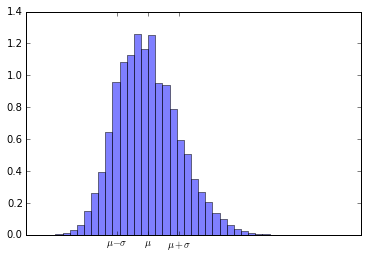

In [14]:
hist(np.log(a), denote_sigma=True)

### Common Distributions

Certain distributions are very common in the daily life of a data scientist.

#### Uniform distribution

In a uniform distribution, each element occurs with the same frequency (or probability).

In [15]:
def print_info(a):
    mu, std = a.mean(), a.std()
    print "Mean %.2f, std %.2f, %d%% within one std from mean" % \
        (mu, std, 100 * ((a > mu - std) & (a < mu + std)).mean())

Mean 0.50, std 0.29, 57% within one std from mean


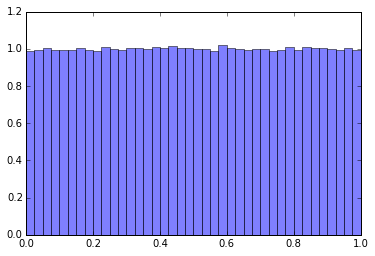

In [16]:
a = np.random.random(N)
print_info(a)
hist(a)

#### Normal distribution

- The _Gaussian_ or _normal distribution_ is the most common distribution we encounter in natural observations. 
- If $X$ is normally distributed, with mean $\mu$ and standard deviation $\sigma$, we write $X \sim N(\mu, \sigma)$ 
- Its probability density function, is given by:

$$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{ -\frac{(x-\mu)^2}{2\sigma^2} }$$

- A special case is the _standard normal distribution_, when $\mu = 0$ and $\sigma = 1$.
- If $X \sim N(0, 1)$ is a standard normally distributed variable, then $aX + b \sim N(b, a)$

In [17]:
def gaussian(x, mu=0, sigma=1):
    return (2 * np.pi * sigma ** 2) ** (-1/2.) * np.exp(-np.square(x - mu)/(2 * sigma ** 2))

Mean 10.00, std 2.00, 68% within one std from mean


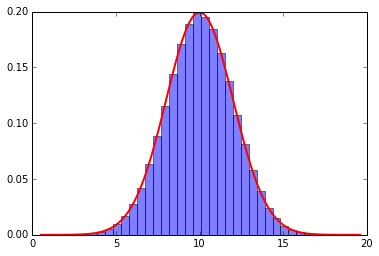

In [18]:
mu, std = 10, 2
a = mu + std * np.random.randn(N)  # np.random.randn gives a standard normal distribution
print_info(a)
hist(a)
xx = np.linspace(a.min(), a.max(), 100)
f = plt.plot(xx, gaussian(xx, mu, std), 'r', linewidth=2)

It's a result from the **central limit theorem** (CLT) that, given certain conditions, the mean of a sufficiently large number of iterates of independent random variables, each with a well-defined expected value and well-defined variance, will be approximately normally distributed, regardless of the underlying distribution.
([Wikipedia](https://en.wikipedia.org/wiki/Central_limit_theorem))

#### Binomial distribution

- The _binomial distribution_ describes the probability of $k$ success in $n$ attempts, each with chance $p$.
- For example, the probability of getting $k$ heads in $n$ coin tosses, each having a chance of $p = 1/2$.
- Its probability mass function is given by:

$$p(k) = {n\choose k}p^k(1-p)^{n-k}$$
- It has $\mu = np$ and $\sigma = \sqrt{np(1-p)}$.
- In the coin toss example, the expected value of the number of heads is $n/2$, and the variance is $n/4$.

Mean 4999.97, std 50.07, 68% within one std from mean


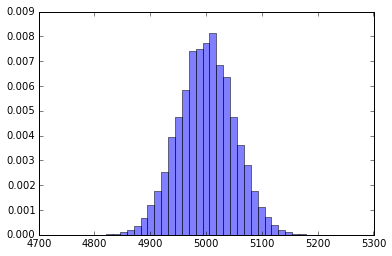

In [19]:
a = np.random.binomial(n=10000, p=.5, size=N)
hist(a)
print_info(a)

- If $n$ is large enough, the binomial distribution $B(n, p)$ will approximate the normal distribution $N(np, \sqrt{np(1-p)})$
- This is generally a big timesaver as going through combinations ${n}\choose{k}$ can be computationally expensive.
- This fact is known as the [Moivre–Laplace theorem](https://en.wikipedia.org/wiki/De_Moivre%E2%80%93Laplace_theorem)


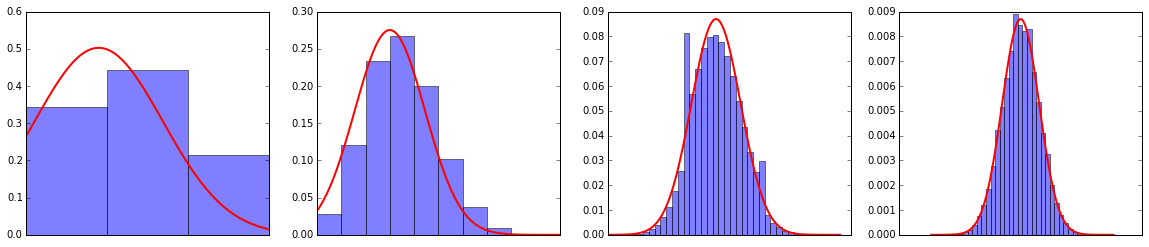

In [20]:
p = .3
plt.figure(figsize=(20,4))
for no, n in enumerate([3, 10, 100, 10000]):
    plt.subplot(1,4,no+1)
    a = np.random.binomial(n=n, p=p, size=N)
    xx = np.linspace(a.min(), a.max(), 100)
    f = plt.plot(xx, gaussian(xx, n * p, np.sqrt(n * p * (1 - p))), 'r', linewidth=2)    
    hist(a, bins=min(n, 40)), plt.xticks([])

#### Exponential distribution


- The _exponential distribution_ with parameter $\lambda$ is given by:

$$f(x) = \lambda e^{-\lambda x}$$

- It has $\mu = \sigma = 1/\lambda$.

Mean 0.33, std 0.33, 86% within one std from mean


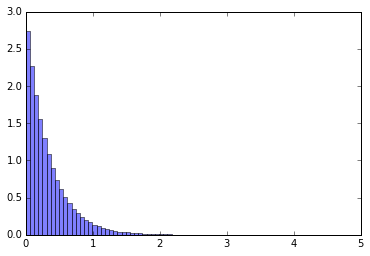

In [21]:
a = np.random.exponential(scale=1/3., size=N)  # scale parameter = 1/lambda, so lambda = 20 here
hist(a, bins=80)
print_info(a)

# Probability

- Probability and statistics are closely related, as describing a random variable $X$ is the same as describing the distribution of the dataset where this variable is drawn from.
- The probability of a randomly drawn value is equal to the relative frequency of the value in the distribution: 

$$P(X = x) = \frac{\text{ number of times } x \text{ occurs in } X}{\text{number of elements in }X}$$

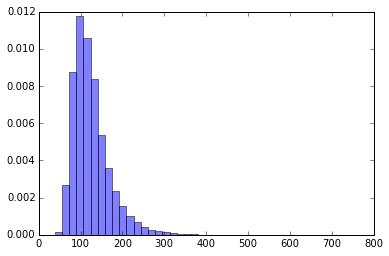

In [22]:
N = 1e6
X = (100 - 20 * np.log(np.square(np.random.randn(N)))).astype(int)  # some crazy dataset
hist(X)

Note that the `numpy` notation turns out to be very intuitive for describing probabilities. 

In [23]:
print (X == 100).mean()  # the chance that a randomly drawn variable X is equal to 100
print (X < 100).mean()  # the chance that a random variable is smaller than 100
print (X >= 100).mean()  # the chance that a random variable is greater than or equal to 100

0.012193
0.317182
0.682818


In [24]:
P = lambda x: x.mean()  # let's write it as a function P(x) = x.mean()

In [25]:
print P((X == 100) | (X == 101))  # the chance that a random variable is equal to 100 or 101
print P((X == 100) & (X == 101))  # the chance that X is both 100 and 101 - which is nonsense (so P = 0)
print P((X <= 100) | (X > 100))  # the chance that X <= 100 or X > 100 (which is always)

0.024303
0.0
1.0


- The _expected value_ of $X$ is defined the weighted average of all possible outcomes of $X$, weigthed by their probabilities.
- Mathematically, it is defined as $E(X) = \sum_{x \in X} x P(X = x)$.
- The expected value E(X) is equal to the mean of the distribution from which X is drawn
- Often we write $\mu_X$ instead of $E(X)$

In [26]:
X.mean()

124.94826399999999

In [27]:
sum([P(X == x) * x for x in xrange(X.min(), X.max() + 1)])

124.94826400000012

In [28]:
E = lambda x: x.mean()
E(X)

124.94826399999999